# Chapter 10: Introduction to Artificial Neural Networks with Keras
ANNs are at the core of deep learning.

This chapter covers:
 - the very $1^{st}$ ANN architectures
 - Multi-layer perceptrons
 - Implementation with Keras
 
Keras: API for building, training, evaluating, and running different types of ANNs. Chapter 12 covers modifying/creating different models in Keras, but Keras lower-level API is good to know for extra flexibility.

## From Biological to Artificial Neurons
- First ANN architecture introduced by McCulloch and Pitts in 1943
 - presented a simple, computational model of how biological neurons might work
 - used propositional logic
- ANN research went dormant.
- ANNs re-emerged because:
 - lots more data available
 - ANNs frequently outperform other ML algorithms on large and complex problems.
 - huge increase in computing power
 - training algorithms have improved
 - theoretical limitations are frequently benign
 
 
### Biological Neurons
Biological neurons are organized as: networks of billions, each neuron is connected to others, they are seemingly **organized in consecutive layers**, and a neuron(s) firing signals other neuron[s] to fire.

Note: Connectionism is the study of Neural Networks.


### Logical Computations with Neurons
The model proposed by McCulloch and Pitts is called the **artificial neuron**.

The **artificial neuron**:
 - one or more binary inputs
 - one binary output

## The Perceptron
One of the simplest ANN architectures.

Based on an artificial neuron called the *threshold logic unit* (or *linear threshold unit*) that is different to the one using propositional logic.

**Threshold Logic Unit** (TLU) (better type of artificial neuron)
- inputs are now numbers (instead of binary)
- input connections associated with a weight
- computes weighted sum of inputs; z (linear equation)
 - $z = w_1x_1 + w_2x_2 + ... + w_nx_n$
- applies a step function to z
 - $step(z)$; (nonlinear) transformation

Common step functions used in the perceptron:
 - $heaviside(z)$ = {0 if $z < 0$, 1 if $z \geq 0$}
 - $sgn(z)$ = {-1 if z < 0, 0 if z = 0, 1 if z > 0}
 
Training a TLU in this case means finding the values for the weights that fit the training data.

Note: **A perceptron is a layer of TLUs. The TLU is a single artificial neuron.**

**Def'n** Dense Layer: When all the neurons in a layer are connected to all the neurons in the previous layer
 - aka "fully connected" layer
 
**Def'n** Input neurons: form the input layer and are just the input data.

**Def'n** Bias Neuron: An extra bias feature added to the Perceptron.

The Greek letter $\phi$ is the notation for the activation function.

Note: The activation function for a Perceptron is the step function

How is a perceptron trained? The connection weight between two neurons is increased when they have the same output. Connections that help reduce the error are reinforced. The Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from inputs that would have contributed to the correct prediction.

*Perceptron learning rule* (weight update):
$w_{i,j}^{nextStep} = w_{i,j} + \eta(y_i - \hat{y_i})x_i$
- $w_{i,j}$ is the connection weight for the i-th input neuron and j-th output neuron.
- $\eta$ is the learning rate.
- $y_i$ is the target output of the j-th output neuron for the current training instance.
- $\hat{y_i}$ is the output of j-th output neuron for the current training instance.
- $x_i$ is the value of the current training instance.

Perceptrons are incapable of learning complex patterns because the output is linear unless the data is linearly separable. This is called the *Perceptron Convergence Theorem*.

SK-learns `Perceptron` class provides a single TLU network:

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [2]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

Notice that Perceptron's learning algorithm strongly resembles that of Stochastic Gradient Descent (SGD); they are equivalent when tweaking SGD's hyperparameters to loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

Perceptrons do not output class probabilities, unlike Logistic Regression (LRC).

People critiqued Perceptrons because of some limitations, but these were largely eliminated by stacking Perceptrons: a concept called **Multi-layer Perceptron (MLP)** (try exercise on p285 to verify the XOR problem is solved with MLPs).

### Multi-Layer Perceptron and Backpropogation
MLP composition:
 - one input layer (passthrough layer)
 - one or more layers of TLUs: hidden layer
 - one final layer of TLUs: output layer
 - every layer except output contains bias neuron
 - every layer is fully connected (for now)
 
Layers close to the input layer are called *lower layers*, layers closer to the output layer are *upper layers*. Signals only flow forward, so this is a **feedforward neural network**. An ANN with two or more hidden layers is called a *Deep Neural Network*. 

MLPs are trained using **backpropogation** which is simply Gradient Descent that automatically computes gradients. It passes forward, then backward, and is able to compute the gradient of the network’s error with regards to every single model parameter; it finds out how each connection weight and bias term should be changed to reduce the error. Once it has all the gradients, it just performs gradient descent.

Note: Automatically computing gradients is called *autodiff*.

In detail, backpropogation:
 - Handles the training set in mini-batches and goes through the full training set multiple times; each pass is called an epoch.
 - Each mini-batch is sent to the input layer, but recall the input layer just passes to the first hidden layer. The output computed at layer i is passed as input to layer j, then the layer j output is passed as input into layer k, and so on until it reaches the true "output" layer. All intermediate results (at each layer) are stored for backpropogation. This is the forward pass.
 - Next, the algorithm measure's the network's output error. It uses a loss function that compares the desired (true) outputs to the actual outputs (predictions) of the network.
 - It then computes how much each output contributed to the error. This is done by applying the *chain rule* from calculus.

For the above algorithm to work properly, the authors used the logistic function instead of the step function. The step function only has flat segments and the gradient cannot be computed. The logistic function has a well-defined, nonzero derivative everywhere. Backpropogation works with other activation functions as well. Two other popular activation function are:

- Tanh
 - The output values range from -1 to 1, so the mean is centered at 0 and convergence is faster.
 
- RELU
 - Fast to compute and does not have a maximum, which reduces Gradient Descent issues.
 
Activation functions are used to create nonlinearity between layers, 

Chaining linear transformations together results in a linear transformation, therefore **activation functions** *are used to create nonlinearity between layers*. 

ADD WHY NEED NONLINEARITY

## Regression MLPs
If you want to predict a single value, say, the price of a house given many features, then you just need a single output neuron. 

For multivariate regression, predicting multiple outputs at once, you need one output neuron per dimension. EX: Locating the center of an object in an image requires predicting 2D coordinates, so you need two output neurons. Placing a bounding box around that object will require two more numbers: the width and height of the image; you will have 4 output neurons.

When building a Regression MLP, you **do not want to use an activation function** so the *output can have any range of values*. Or to guarantee all outputs are positive, use RELU (or softplus). To guarantee that outputs fall into a range of values, use the logistic or tanh activations and scale the labels to [0,1] for logistic and [-1,1] for tanh.

The typical loss function:
 - MSE (mean squared error)
 - MAE (mean absolute error) (if outliers)
 - Huber loss (combination of MSE and MAE)
  - Huber is less sensetive to outliers than MSE, but converges faster and is more precise than MAE.
 

Table 10-1: Typical Regression MLP architecture:

|Hyperparameter| Typical Value|
|--------------|--------------|
| # input neurons| One per input feature|
| # hidden layers| Depends on problem. Typically 1-5|
| # neurons per hidden layer| Depends on problem. Typically 1-100|
| # of output neurons| 1 per prediction dimension|
| Hidden activation| RELU (or SELU)|
| Output activation| **None** or RELU/softplus (positive outputs) or Logistic/tanh (if bounded)|
| Loss function| MSE or MAE/Huber (if outliers)|

## Classification MLPs
For **binary classification**, use a single output neuron with the logistic activation: the output will be between 0 and 1, and is the $P(positive\_class)$. Note: $P(negative\_class) = 1-P(positive\_class)$

MLPs also handle **multilabel binary classification**: An example being an email classification system that predicts whether an incoming email is spam or ham AND predicts whether it is urgent or non-urgent. In this case, use two output neurons with the logistic activation. The first neuron outputs the probability that the email is spam, and the second neuron outputs the probability it is urgent.
Note that probabilities do not have to add up to one as they are different classes: if our two neurons output 20% chance the email being spam and 20% chance of the email being urgent, then we say the email is non-spam and non-urgent.

We could even have a case where an email is urgent spam! But this would probably be an error.

If each instance belongs to a single class out of 3 or more possible classes, then one output neuron per class is needed and we will need to use the softmax activation function for the output layer as it ensures the probabilities are between 0 and 1 and add up to 1 for each prediction. This is called **multiclass classification**. Regarding the loss function, since we use probability distributions, we usually use cross-entropy (aka log loss). 

|Hyperparameter| Binary Classification| Multilabel Binary clf| Multiclass classification|
|--------------|----------------------|----------------------|--------------------------|
| Input and hidden layers| Same as regression| Same as regression| Same as regression|
| # output neurons| 1| 1 per label| 1 per class|
| Output layer activation| Logistic| Logistic| Softmax|
| Loss function| Cross-entropy| Cross-entropy| Cross-entropy|

## Implementing MLPs with Keras
Keras is a high-level Deep Learning API that allows ease in building, training, evaluating, and executing all sorts of Neural Networks!

Keras requires computation backends: 3 popular ones (there are a bunch more) are Tensorflow, Theano, and Microsoft Cognitive Toolkit (CNTK). We will use Tensorflow as Tensorflow's Data API makes it easy to load and preprocess data.

Note: Code examples with Keras.io will need different imports when using tensorflow (or maybe other backends)

### Building an Image Classifier Using the Sequential API
We will build an image classifier for Fashion MNIST, which is similar to MNIST in that the images are 28x28, but the images are of clothes so the problem is more complex.

#### Using Keras to Load the Dataset

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

When loading MNIST or fashion MNIST from Keras rather than SKlearn, the images are already represented as 28x28, instead of a 784 length vector, and the values are integers instead of floats.

In [6]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


The dataset is, by default, split into training and testing sets, but we should create a validation set. We do this by further splitting the training set. We will also scale the images to a [0,1] range by dividing them by 255 (the max pixel intensity); the neural network needs scaled features.

In [7]:
# The first 5k observations go into the validation set
# The rest go into the training set
# Note we scale the training features
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

We need a list of the labels since numeric outputs will not be super descriptive.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
print(y_train[0])
print()
print(class_names[y_train[0]])

4

Coat


#### Creating the Model Using the Sequential API
We will create a multiclass classification MLP with the Sequential API using two hidden layers.

In [10]:
model = keras.models.Sequential()                        # Initialize the model
model.add(keras.layers.Flatten(input_shape = [28,28]))   # Input Layer
model.add(keras.layers.Dense(300, activation="relu"))    # Hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation="relu"))    # Hidden layer with 100 neurons
model.add(keras.layers.Dense(10, activation="softmax"))    # Output layer with 1 node for each class

Note the layer with `(keras.layers.Flatten(input_shape = [28,28])` is the input layer flattened to be 784 length, one input neuron for each feature; 784 features per image.

Line-by-line:

1. `model = keras.models.Sequential()` is the simplest kind of Keras model. It is for Neural Networks with a single stack of layers
2. `model.add(keras.layers.Flatten(input_shape = [28,28]))` is the input layer (the first layer). Flatten flattens the image to a 1D vector.
3. `model.add(keras.layers.Dense(300, activation="relu"))` is a Dense, hidden layer with the RELU activation.
4. `model.add(keras.layers.Dense(100, activation="relu"))` is a Dense, hidden layer with the RELU activation.
5. `model.add(keras.layers.Dense(10, activation="softmax"))` is the Dense, output layer with one neuron per class, and softmax because classes are exclusive.

Note: `activation = "relu"` is equivalent to `activation = keras.activations.relu`

Alternatively, we can use the sequential API as such:

In [11]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

The model's `.summary()` method displays info about all the model's layers.

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- Layer is the layer name (automatically generated)
- Output Shape is the number of neurons
- parameters is the number of connections between that layer and the previous.
 - The first layer is 0 because there is not a previous layer to connect.
 
This example only has trainable parameters. See ch. 11 for nontrainable parameters.

Dense layers will have lots of parameters (connections). Between the input layer and the first hidden layer, there are 235500 connections (parameters), which is (784 x 300) for the neurons between the two layers, and 300 bias terms.

This model is quite flexible, but prone to overfitting without enough training data.

To *get a list of layers in a model*:

In [13]:
model.layers #get a list of layers in a model

In [14]:
 model.layers[1].name # or by index

'dense_3'

In [15]:
 model.get_layer('dense_3').name # or by name

'dense_3'

All parameters of a layer can be accessed by the `.get_weights()` and `.set_weights()` methods.

For a Dense layer, this includes the connections and the bias terms.

In [16]:
weights, biases = model.layers[1].get_weights()

In [17]:
weights.shape

(784, 300)

In [18]:
biases.shape

(300,)

Note that when viewing the `weights` vector, all the values are initialized randomly.

The biases were all initialized to zeros, which is fine.

To use different initialization methods, use:

- `kernel_initializer`
 - connection weights; Kernel is another name for the matrix of connection weights
- `bias_initializer`
 - for biases
 
The shape of the weight matrix depends on the number of inputs (number of features). It is recommended to specify the input shape to be able to view the summary or save a model; otherwise it will wait until it knows the input shape to actually build the model. When the model is built, then the weights become initialized.

#### Compiling the Model
After creating the model, we must call `.compile()` to specify the loss function, optimizer, and metrics.

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

We use `sparse_categorical_crossentropy` because we have sparse labels; one target class index from 0 to 9, and classes are exclusive.

If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0.,0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. ?????????????? P299.

Doing binary classification with one or more binary labels, we use the sigmoid (logistic) activation with the loss as `binary_crossentropy`. 

You can convert sparse labels like indices to one-hot vector labels with keras.utils.to_categorical(), and reverse the process with np.argmax(axis=1)

#### Training and Evaluating the Model
We now fit (train) the data.

Other than the training data, the model needs a number of epochs, and optionally the validation set.

If the model performs much better on the training data than on the validation, then the model is overfitting. 

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

# Note that running multiple times picks up where the previous run leaves off.

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7238 - accuracy: 0.7608 - val_loss: 0.5022 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4872 - accuracy: 0.8300 - val_loss: 0.4484 - val_accuracy: 0.8518
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4416 - accuracy: 0.8458 - val_loss: 0.4374 - val_accuracy: 0.8464
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4135 - accuracy: 0.8552 - val_loss: 0.3907 - val_accuracy: 0.8672
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8614 - val_loss: 0.3781 - val_accuracy: 0.8732
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3789 - accuracy: 0.8656 - val_loss: 0.4043 - val_accuracy: 0.8598
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3649 - accuracy: 0.8719 - val_loss: 0.3587 - val_accuracy:

We did it! Also, the validation accuracy is pretty close to the training accuracy, so we are not overfitting the data!

Note: instead of `validation_data` with an X and y validation set, we could set `validation_split` to a ratio of the training data and it will automatically split the training set for us.

If the training set is very skewed (not the case with MNIST where each of the 10 classes represents 10% of the data), it is useful to set the `class_weight` argument higher with underrepresented classes and lower with overrepresented ones.

Computing per-instance weights is set using `sample_weight`. This could be useful if some data is labelled by experts while other labels are done by crowdsourcing: you may want to give more weight to the former.

Sample weights (but not class weights) may be added to the validation data by adding a 3rd item to the `validation_data` tuple.

The `.fit()` method returns a `history` object containing:

- Training params
 - `history.params`
- List of epochs it went through
 - `history.epoch`
- *Dictionary of loss and metrics at each epoch* (most important)
 - `history.history`
 - returns metrics for training and validation (only if validation was specified)
 
The `history.history` dictionary converted into a Pandas dataframe may be used to get the learning curves.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

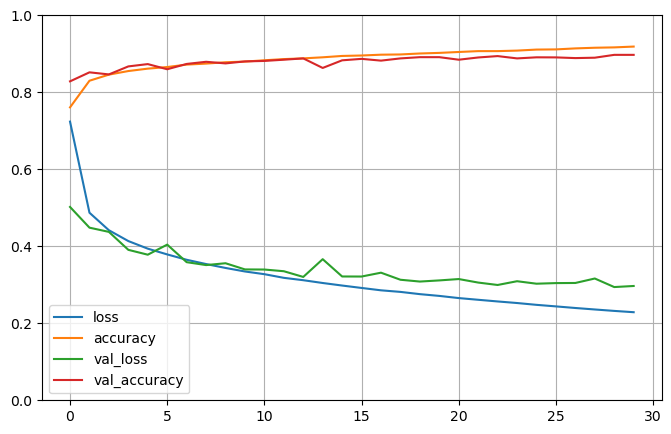

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

If the training and validation accuracy curves are close, there is not much overfitting.

Training performance usually ends up beating validation performance when training for long enough.

Remark: the loss looks like it is still going down, therefore we should continue training. Calling .fit() again on the model picks up where it left off.

Not satisfied with model's performance? Tune the hyperparameters being the number of hidden layers, neurons per layer, activation function per layer, number of epochs, and batch size.

Once satisfied with the validation accuracy, evaluate on the test set.

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 63.6648 - accuracy: 0.8433


[63.664817810058594, 0.8432999849319458]

Remember not to tweak hyperparameters on the test set.

#### Using the Model to Make Predictions
We can use the model's `.predict()` method to make predictions on new instances. We don't have new pictures, so we will just use the first 3 instances of the test set.

In [24]:
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [25]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

For each instance, the model estimates a probability of each class. In this case, it is just predicting the 10th, 3rd, and 2nd classes as 100%. 

### Regression MLPs using Sequential API
We will use SKlearn's california housing data (no missing values, no categorical features) for the example.

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# Split into training_full and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

# Split training_full into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# call Scaler transformer
scaler = StandardScaler()

# Scale all feature data
X_train_scaled = scaler.fit_transform(X_train)  # Only fit_transform the training data
X_valid_scaled = scaler.transform(X_valid) # Only transform the validation data
X_test_scaled = scaler.transform(X_test)   # Only transform the testing data

Building the regression MLP is similar to the classification MLP, but recall that we use different loss functions, no activation function, and one output neuron (in this case).

In this case, we will use a single hidden layer with fewer neurons to avoid overfitting, because the data is noisy.

In [27]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])

In [28]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [29]:
history = model.fit(X_train, y_train, epochs=20,
 validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: inf - val_loss: inf
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: inf - val_loss: 23225094588116240738565011294650368.0000
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1616515411154271880801231577284608.0000 - val_loss: 9910335869709443814647660544.0000
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 689780503100770865503010816.0000 - val_loss: 4228833888204715196416.0000
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 294335427659077517312.0000 - val_loss: 1804475748581376.0000
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 125595430158336.0000 - val_loss: 769983168.0000
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 53592460.0000 - val_loss: 329.5304
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 24.2146 - val_loss: 1.3143
E

In [30]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 1.3649


In [31]:
X_new = X_test[:3] # pretend these are new instances

In [32]:
y_pred = model.predict(X_new)

The Sequential API is good, but sometimes we need more complex models. For that, we need the "Functional API".

#### Building Complex Models Using the Functional API
An example of a non-sequential neural network is a **deep and wide** neural network.

It connects all or part of the inputs directly to the output layer. This architecture makes it possible to learn **deep patterns** (using the deep path, aka sequential path) **or simple rules** through the path directly to the output layer. 

In contrast, a regular MLP forces all data to go through the full stack of layers where simple patterns may be distorted by the sequence of transformations.

Let's build a deep and wide neural network on the Cali housing data.

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

Line-by-line:

1. Create an `input` object because we may have multiple inputs (explained later).
2. Next we create a hidden layer. The `input` object called `input_` is passed (connected) to the hidden layer via some syntax that allows a variable behind the function.
3. Create another hidden layer with the same syntax, in this case. Pass it the output of the layer before it.
4. Next we create a concatenate layer that connect the input layer and the *output* of the second hidden layer. Connecting it to the output of the second hidden layer means it skipped transformations in both hidden layers and will go directly into the Output layer.
5. We create an output layer and connect the concatenated layer. Recall this is a univariate regression problem so there is 1 neuron and no activation function.
6. Now we create the model and specify inputs and outputs.

Now we do the standard procedures: compilation, training (fitting), evaluation.

But wait!!! We said we can send **multiple inputs**. "What if we want to send a **subset of features** through the wide path and a different subset (possibly overlapping) through the deep path". We can use multiple inputs as such

In [34]:
input_A = keras.layers.Input(shape=[5])    # This layer goes wide
input_B = keras.layers.Input(shape=[6])    # This layer goes deep
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)  # Connect to B as it goes deep
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)  # Connect to hidden1
concat = keras.layers.concatenate([input_A, hidden2])  # Connect A to output of deep layers
output = keras.layers.Dense(1)(concat) # Connect to output
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output]) # Note two input layers

We compile the model as usual, but when fitting, evaluating and predicting, *we must pass pairs of matrices*!!!

Note we are splitting and overlapping on **features** which means features 2-4 go through both the deep and wide paths.

In [35]:
model.compile(loss="mse", optimizer="sgd") # Compile the model as usual

# Split all feature matrices into A and B sets
# Note we are sending all observations (instances)
# Note we are SPLITTING FEATURES, and the split overlaps on features 2-5
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

# Split the split feature test sets into "new" instances
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Fit model and store as variable to inspect history object
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid))

# Eval
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
# Predict
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

There are also many cases where you may want **multiple outputs**:

- The task may demand it. What if you want to locate AND classify an object in a picture. This is a classification task and regression task. We must find the coordinates to the objects center, and width and height, and classify the object.

- Multiple outputs can help with multiple independent tasks that use the same data. You could do one neural network per task, but multi-output neural networks will learn features that are useful across tasks better.

- Another use is regularization (constraining to reduce overfitting). For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-15, p308) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

**Adding extra outputs** is to simply connect extra output to the appropriate layers and add it to the list of outputs.

In [36]:
# Same inputs and hidden layers as the block above
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

For compilation, each output needs it own loss or it will compute the same loss for every output. loss weights should also be specified as we should care more about the main output than the auxilary.

In [37]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Since we have multiple outputs, we need to train (fit) the model with labels for each output. In this case, the labels are the same so we will use the list [y_train,y_train].

In [38]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train],
                    epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 3.5647 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 2.3512
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.8494 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.5693
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.4471 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3774
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3524 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3300
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3305 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3176
Epoch 6/20
363/363 [====================

Evaluating returns the total and individual losses

In [39]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B],
                                                 [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3633


In [40]:
print(total_loss)
print(main_loss)
print(aux_loss)

nan
nan
1.3633192777633667


Predict returns predictions for each output layer:

In [41]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [42]:
print(y_pred_main)
print(y_pred_aux)

[[nan]
 [nan]
 [nan]]
[[2.0608408]
 [2.0608408]
 [2.0608408]]


You can build whatever architecture you want with the Functional API

### Building Dynamic Models Using the Subclassing API
The Sequential and Functional APIs are declarative: you declare the layers and how they should connect, then feed the model some data for training or inference. The advantages are you can save, clone, and share the model, its structure can be displayed and analyzed, the framework can infer shapes and check types, so debugging is easy. The problem is its static.

The **Subclassing API** allows dealing with loops, differing shapes, conditional branching, and other dynamic behaviors. This is the imperative style.

How to use the Subclassing API? Subclass the *Model* class, create your layers in the constructor, then perform computations in the `call` method.

The below model is equivalent to the one using the Functional API.

In [43]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


# model = WideAndDeepModel()

Note that *we never created input layers*. We just use the input argument in the call method. Other than that and separating the creating from connecting the layers, this is the same as the Functional API example.

The biggest difference between the Functional and Subclassing APIs are that we *can do anything we want in the call method*: `for` loops, `if statements, etc, anything your heart desires!

This extra flexibility costs the ability to inspect (with summary), save, and clone the model. So unless you need the extra flexibility, stick with the Sequential or Functional APIs.

### Saving and Restoring a Model
Saving a model is as simple as:

In [44]:
model.save("my_keras_model.h5")

Keras saves the model's architecture (including every layer's hyperparameters) and the value of all model parameters for every layer being the connection weights and biases, all in the HDF5 format (.h5). It also saves the optimizer and any state it might have. 

You should typically have a script that trains a model, saves it, then loads it. Loading is just as easy.

In [45]:
model = keras.models.load_model("my_keras_model.h5")

Recall: saving works for Sequential and Functional APIs, but not Subclassing API.

With the Subclassing API, you can use the save_weights() and load_weights() methods, but nothing else is saved.

**What if training lasts several hours**? This is very common on large datasets. We want to make checkpoints in training (fitting), just in case. You can use **callbacks** with the .fit() method.

### Using Callbacks
The `.fit()` method accepts a `callbacks` argument that **specifies a list of objects to call** at the start and end of training, the start and end of each epoch, and the start and end of each batch.

The `ModelCheckpoint` callback saves chechpoints at regular intervals during training, by default, at the end of each epoch.

In [47]:
# Build and compile a model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

# Then train the model with the callbacks argument
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3240 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3122
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3122
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3123
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3240 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3124
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3124
Epoch 6/20
363/363 [====================

**Keras has "early stopping" built-in**: the `save_best_only = True`, when used with a validation set only saves the on validation accuracies that are better than before; this prevents overfitting and running for too long.

Restore the last model saved after training and it will be the one that performed best on the validation data.

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True) # True for early stopping

history = model.fit((X_train_A, X_train_B), 
                    y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), 
                                     y_valid), # Validation data is needed for above
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3240 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3122
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3240 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3123
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3123
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3124
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3124
Epoch 6/20
363/363 [====================

Another way is with the `EarlyStopping` callback. It interrupts when it measures no progress on the validation set for a number of epochs (defined by a `patience` argument) and optionally rolls back to the best model with `restore_best_weights = True`. 

Combining both callbacks is smart in case of a computer crash.

In [49]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, # Epochs without progress
                                                  restore_best_weights=True) # rollback model
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3123
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3123
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3240 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3123
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3122
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3123
Epoch 6/20
363/363 [====================

Many more callbacks available at https://keras.io/callbacks/

We can also write our own callbacks: the following displays the ratio between training loss and validation loss during training.

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

Note the function definition `on_epoch_end`. As suspected, we can use:
- on_epoch_begin()
- on_train_begin()/_end()
- on_batch_begin()/_end()

Callbacks are usable for evaluation and prediction, called by evaluate() and predict(), respectively.
- on_test_begin()/_end()
- on_test_batch_begin()/_end()

- on_predict_begin()/_end()
- on_predict_batch_begin()/_end()

### Visualization Using Tensorboard
Tensorboard is an interactive viz tool. It is already installed with Tensorflow.

It allows:
 - view learning curves during training
 - compare learning curves between runs
 - visualize the computation graph
 - analyze training statistics
 - view images generated by the model
 - viz complex n-D data down to 3D
 - and more!!
 
To use: modify program to output special binary log files called *event files*. Each binary data record is called a *summary*... 

We need to create a "log" directory and connect the Tensorboard to it. Then, Tensorboard will automatically update when event files in the log directory change.

In [52]:
import os

In [53]:
root_logdir = os.path.join(os.curdir, "my_logs") # Create the special binary log directory

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

In [56]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3240 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3123
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3124
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3240 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3122
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3241 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3122
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: 1.3240 - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: 1.3123
Epoch 6/20
363/363 [====================

Because I use a Jupyter notebook:
 - Go to anaconda prompt
 - cd until at the directory with `my_logs` directory
 - run command: tensorboard --logdir=./my_logs --port=6006
 - open up the local host given (http://localhost:6006)

## Fine-Tuning Neural Network Hyperparameters
The flexibility comes with some drawbacks, one being there are many hyperparameters.

We learned that we can create any type of network architecture, and even in a simple MLP we still can modify the number of layers, neurons per layer, activation functions, weight initializations, and more.

One option is to tune parameters manually, or we can use k-fold CV using GridSearchCV or RandomizedSearchCV which is likely the better option.

**To use k-fold CV on our Keras models, we need to wrap the model in objects that mimic SKlearn regressors.**

1. Create a function that builds and compiles a Keras model

In [60]:
# Wrapped Sequential model


def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

2. Create a Keras wrapper based on the model function

In [61]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

`KerasRegressor` is a thin wrapper around our model. It doesnt add anything (since we didn't tell it to), and just uses the parameters set in `build_model()`

3. Now we can use the object like a regular SKlearn regressor

In [62]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: inf - val_loss: 5579897461274348970077855940608.0000
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 1269171731140759508655777251328.0000 - val_loss: 70654606994918356445529374720.0000
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 16070724337377173301301870592.0000 - val_loss: 894655576806611258615791616.0000
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 203493504808439916244500480.0000 - val_loss: 11328500635488454556254208.0000
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 2576717305035054221623296.0000 - val_loss: 143445421746472586575872.0000
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 32627349817600971374592.0000 - val_loss: 1816361824626048761856.0000
Epoch 7/100
363/363 [==============================] - 0s 928us/step - loss: 413140033985390313472.0000 - val_loss

KeyboardInterrupt: 

Actually, we shouldnt train using the code above, let's use k-fold CV in training it.

Note: Since there are many hyperparameters, it's better to use RandomizedSearch over GridSearch.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

This is identical to what we did in Chapter 2, but with extra arguments to the .fit() method.

Exploration could last many hours depending on the size of the data, complexity of the model, hardware, etc.

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model

There are many libraries to use to optimize hyperparameters
- Scikit-Optimize
- Spearmint
- Sklearn-Deap
- etc